In [2]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
import re
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rc
import matplotlib.font_manager as fm
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(5)
import matplotlib.pyplot as plt
fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '../NanumSquareRoundEB.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [5]:
df=pd.read_csv('cs_data.csv')
df.drop(columns="Unnamed: 0", inplace=True)

In [6]:
df

,제목,분류
0,반품이 안되는 경우도 있나요?,상품관련
1,반품/교환 신청을했는데 처리소요 시간이 얼마나되나요?,상품관련
2,현금 환불요청을 했는데 환불은 언제 되나요?,상품관련
3,신용카드 부분취소는 가능한가요?,상품관련
4,반품/교환 신청을했는데 처리소요 시간이 얼마나되나요?,상품관련
...,...,...
234,회원가입하면 혜택이 있나요?,회원
235,비회원도 구매할 수 있나요?,회원
236,아이디와 패스워드를 잊어버렸어요!,회원
237,주소와 전화번호등 개인정보 변경은 어떻게 해요?,회원


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 2 columns):
제목    239 non-null object
분류    239 non-null object
dtypes: object(2)
memory usage: 3.9+ KB


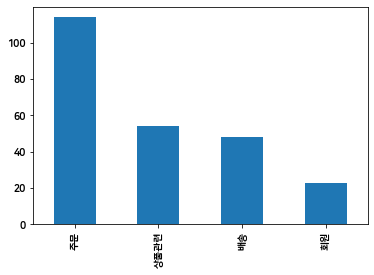

In [9]:
df['분류'].value_counts().plot(kind='bar')

In [10]:
#라벨인코딩
encoder=LabelEncoder()
df['분류'].unique()
encoder.fit(df['분류'].unique())
target=encoder.transform(df['분류'])

df['분류']= target
df['분류']


0      1
1      1
2      1
3      1
4      1
      ..
234    3
235    3
236    3
237    3
238    3
Name: 분류, Length: 239, dtype: int32

In [11]:
df #0이 ham, 1이 spam

,제목,분류
0,반품이 안되는 경우도 있나요?,1
1,반품/교환 신청을했는데 처리소요 시간이 얼마나되나요?,1
2,현금 환불요청을 했는데 환불은 언제 되나요?,1
3,신용카드 부분취소는 가능한가요?,1
4,반품/교환 신청을했는데 처리소요 시간이 얼마나되나요?,1
...,...,...
234,회원가입하면 혜택이 있나요?,3
235,비회원도 구매할 수 있나요?,3
236,아이디와 패스워드를 잊어버렸어요!,3
237,주소와 전화번호등 개인정보 변경은 어떻게 해요?,3


In [237]:
tfidf = TfidfVectorizer(ngram_range=(1, 2), min_df = 3, max_df = 0.9, lowercase=True, stop_words='english')
tfidf

TfidfVectorizer(max_df=0.9, min_df=3, ngram_range=(1, 2), stop_words='english')

In [238]:
#testdata traindata나누기
train=df[:5000]
test=df[5000:]
X_train, X_test, y_train, y_test = train_test_split(df['v2'], df['v1'], test_size=0.2, random_state=42)

In [239]:
X_train.head()
y_train.head()

1978    0
3989    1
3935    0
4078    0
4086    1
Name: v1, dtype: int32

In [240]:
X_test.head()

3245    Funny fact Nobody teaches volcanoes 2 erupt, t...
944     I sent my scores to sophas and i had to do sec...
1044    We know someone who you know that fancies you....
2484    Only if you promise your getting out as SOON a...
812     Congratulations ur awarded either 鶯500 of CD g...
Name: v2, dtype: object

In [241]:
tfidf.fit(X_train)

TfidfVectorizer(max_df=0.9, min_df=3, ngram_range=(1, 2), stop_words='english')

In [242]:
train_tfidf_df = tfidf.transform(X_train)
train_tfidf_df

<4457x3636 sparse matrix of type '<class 'numpy.float64'>'
	with 34975 stored elements in Compressed Sparse Row format>

In [243]:
test_tfidf_df = tfidf.transform(X_test)
test_tfidf_df

<1115x3636 sparse matrix of type '<class 'numpy.float64'>'
	with 7811 stored elements in Compressed Sparse Row format>

In [244]:
from sklearn.linear_model import LogisticRegression

SA_lr = LogisticRegression(random_state = 0)

In [245]:
SA_lr.fit(train_tfidf_df, y_train)

LogisticRegression(random_state=0)

In [246]:
test_predict = SA_lr.predict(test_tfidf_df)

In [247]:
from sklearn.metrics import accuracy_score

print('감성 분석 정확도 : ', round(accuracy_score(y_test, test_predict), 3))

감성 분석 정확도 :  0.965


In [248]:
import pickle
import joblib

In [249]:
saved_model = pickle.dumps(SA_lr)

In [250]:
lr_from_pickle = pickle.loads(saved_model)

In [251]:
lr_from_pickle.predict(tfidf.transform(["WINNER!! I HAVE A DATE ON SUNDAY WITH WILL!! Free~~"]))

array([0])

In [252]:
joblib.dump(SA_lr, 'spam_ham_lr.pkl')

['spam_ham_lr.pkl']

In [253]:
lr_from_joblib = joblib.load('spam_ham_lr.pkl')
lr_from_joblib

LogisticRegression(random_state=0)

-----------------------------------------------------------------------------------------

In [202]:
spam=df[df.v1==1]
ham=df[df.v1==0]

In [203]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [204]:
ham_tfidfv = TfidfVectorizer().fit(ham['v2'])
print(ham_tfidfv.transform(ham['v2']).toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [254]:
ham_word=ham_tfidfv.vocabulary_
print(ham_word)

{'go': 2504, 'until': 6327, 'jurong': 3218, 'point': 4542, 'crazy': 1434, 'available': 565, 'only': 4211, 'in': 2979, 'bugis': 940, 'great': 2575, 'world': 6713, 'la': 3329, 'buffet': 939, 'cine': 1194, 'there': 6015, 'got': 2542, 'amore': 349, 'wat': 6513, 'ok': 4181, 'lar': 3357, 'joking': 3189, 'wif': 6629, 'oni': 4207, 'dun': 1850, 'say': 5137, 'so': 5487, 'early': 1870, 'hor': 2841, 'already': 324, 'then': 6010, 'nah': 3956, 'don': 1772, 'think': 6029, 'he': 2713, 'goes': 2510, 'to': 6114, 'usf': 6364, 'lives': 3490, 'around': 477, 'here': 2758, 'though': 6047, 'even': 2027, 'my': 3943, 'brother': 914, 'is': 3083, 'not': 4096, 'like': 3447, 'speak': 5568, 'with': 6662, 'me': 3709, 'they': 6022, 'treat': 6205, 'aids': 280, 'patent': 4374, 'as': 491, 'per': 4412, 'your': 6822, 'request': 4947, 'melle': 3737, 'oru': 4256, 'minnaminunginte': 3792, 'nurungu': 4122, 'vettam': 6411, 'has': 2690, 'been': 691, 'set': 5244, 'callertune': 1001, 'for': 2296, 'all': 311, 'callers': 1000, 'pres

In [275]:
max_key = max(ham_word, key=ham_word.get)

In [276]:
max_key 

'롻큺'

In [270]:
spam_tfidfv = TfidfVectorizer().fit(spam['v2'])
print(spam_tfidfv.transform(spam['v2']).toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [256]:
spam_word=spam_tfidfv.vocabulary_
print(spam_word)

{'free': 1357, 'entry': 1256, 'in': 1540, 'wkly': 2788, 'comp': 1066, 'to': 2550, 'win': 2772, 'fa': 1289, 'cup': 1127, 'final': 1317, 'tkts': 2545, '21st': 378, 'may': 1760, '2005': 369, 'text': 2500, '87121': 657, 'receive': 2154, 'question': 2122, 'std': 2401, 'txt': 2606, 'rate': 2134, 'apply': 778, '08452810075over18': 75, 'freemsg': 1361, 'hey': 1475, 'there': 2521, 'darling': 1142, 'it': 1572, 'been': 852, 'week': 2745, 'now': 1918, 'and': 763, 'no': 1897, 'word': 2795, 'back': 824, 'like': 1659, 'some': 2353, 'fun': 1370, 'you': 2836, 'up': 2642, 'for': 1349, 'still': 2406, 'tb': 2480, 'ok': 1941, 'xxx': 2817, 'chgs': 1014, 'send': 2278, '鶯1': 2848, '50': 519, 'rcv': 2139, 'winner': 2776, 'as': 792, 'valued': 2668, 'network': 1884, 'customer': 1132, 'have': 1455, 'selected': 2274, 'receivea': 2155, '鶯900': 2883, 'prize': 2094, 'reward': 2209, 'claim': 1027, 'call': 950, '09061701461': 222, 'code': 1051, 'kl341': 1617, 'valid': 2666, '12': 315, 'hours': 1507, 'only': 1949, 'had'

In [267]:
from wordcloud import WordCloud
from nltk import FreqDist  

In [272]:
fd_names = FreqDist(spam_word)
fd_names

FreqDist({'諒it': 2886, '諒harry': 2885, '鶯s': 2884, '鶯900': 2883, '鶯800': 2882, '鶯79': 2881, '鶯750': 2880, '鶯75': 2879, '鶯71': 2878, '鶯600': 2877, ...})

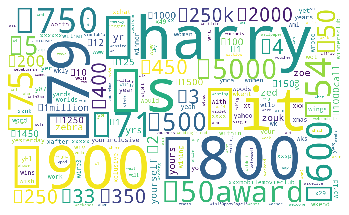

In [261]:
wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies())
plt.axis("off")
plt.show()